# Linear Algebra again: A few points around eigenvalues and eigenvectors

## When does linear mappings do not change too many things? Here: change lengths but not directions?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Helper function that will draw arrows
NAN = float("NaN")
ARDATA = np.array([[0.0, 1.0, 0.9, NAN, 1.0, 0.9],[0.0, 0.0, 0.05, NAN, 0.0, -0.05]])

def drawarrow(start, end, ax, **kwargs):
    x0, y0 = start
    x1, y1 = end
    trans = np.array(start)
    trans.shape = (2,1)
    sx = x1-x0
    sy = y1-y0
    l = np.hypot(sx, sy)
    t = np.arctan2(sy, sx)
    ct = np.cos(t)
    st = np.sin(t)
    R = np.array([[ct, -st], [st, ct]])
    T = l*np.dot(R, ARDATA) + trans
    ax.plot(T[0], T[1], **kwargs)

In [3]:
C = np.array([[ 3.71428571, -0.85714286], [-2.57142857,  3.28571429]])

### Let's  compute $$ C\begin{pmatrix}1\\2\end{pmatrix},\quad C\begin{pmatrix}2\\-3\end{pmatrix}$$

In [4]:
v1 = np.array([[1],[2]])
v2 = np.array([[2],[-3]])
v3 = v1 + v2

w1 = np.dot(C, v1)
w2 = np.dot(C, v2)
w3 = np.dot(C, v3)
print("C.v1 =\n", w1)
print("C.v2 =\n", w2)
print("C.v3 =\n", w3)


C.v1 =
 [[ 1.99999999]
 [ 4.00000001]]
C.v2 =
 [[ 10.        ]
 [-15.00000001]]
C.v3 =
 [[ 11.99999999]
 [-11.        ]]


### observe: we have approximately $C v_1 = 2 v_1$,  $C v_2 = 3 v_2$ but no such relation for $v_3$.

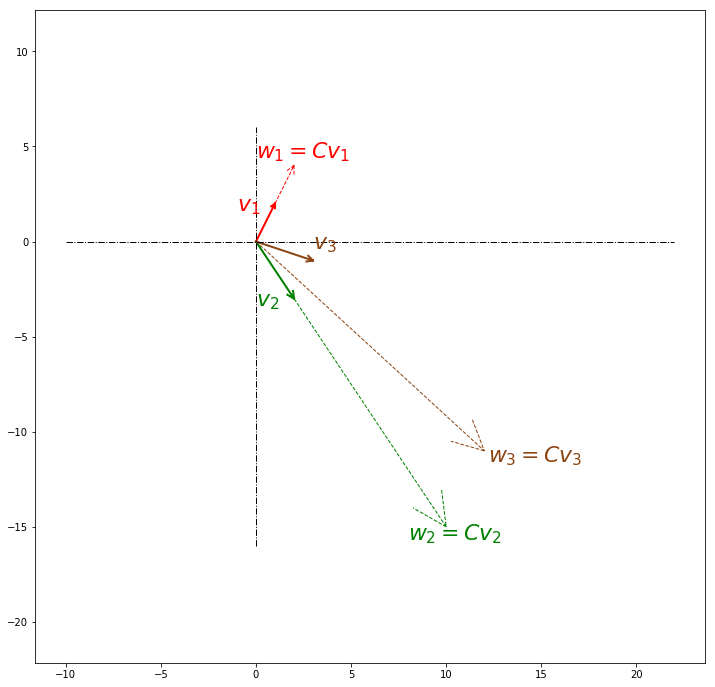

In [5]:
fig, ax = plt.subplots(1,1)

start = (0.0, 0.0)
drawarrow(start, np.squeeze(v1), ax, lw=2,color='red')
plt.text(v1[0]-2, v1[1]-0.4, r'$v_1$', color='red', fontsize=22)
drawarrow(start, np.squeeze(v2), ax, lw=2,color='green')
plt.text(v2[0]-2, v2[1]-0.4, r'$v_2$', color='green', fontsize=22)
drawarrow(start, np.squeeze(v3), ax, lw=2, color='saddlebrown')
plt.text(v3[0], v3[1]+0.6, r'$v_3$', color='saddlebrown', fontsize=22)


drawarrow(start, np.squeeze(w1), ax, lw=1, linestyle = '--',color='red')
plt.text(w1[0]-2, w1[1]+0.4, r'$w_1 = C v_1$', color='red', fontsize=22)
drawarrow(start, np.squeeze(w2), ax, lw=1, linestyle = '--', color='green')
plt.text(w2[0]-2, w2[1]-0.7, r'$w_2 = C v_2$', color='green', fontsize=22)
drawarrow(start, np.squeeze(w3), ax, lw=1, linestyle = '--', color='saddlebrown')
plt.text(w3[0]+0.2, w3[1]-0.6, r'$w_3=C v_3$', color='saddlebrown', fontsize=22)
ax.plot([-10,22], [0,0], linestyle='-.', linewidth=1, color='black')
ax.plot([0,0], [-16,6], linestyle='-.', linewidth=1, color='black')

ax.axis('equal')
plt.show()

* Vector $v_1$ and $v_2$ are transformed into parallel vectors, their size change. A vector transformed in a parallel one by a linear mapping is an eigenvector for this mapping. The size ratio is the corresponding eigenvalue.

* If $v$ is an eigenvector for $C$, so $2v, 3v, -v, \pi v$,... and the size ratio / eigenvalue is the same.

* But it means that if $\lambda$ is an eigenvalue for $C$, the equation $$ C v = \lambda\,v$$ has multiple solutions.

* (dimension 2, but valid for any dimension) If $C = \begin{pmatrix}a & b\\ c&d\end{pmatrix}$ and $\lambda$ is an eigenvalue of $C$, The system $$\begin{cases} ax + by &= \lambda x\\cx + dy &= \lambda y\end{cases}\quad\Longleftrightarrow\begin{cases} (a-\lambda)x + by &= 0\\cx + (d-\lambda)y &= 0\end{cases}$$ 

    has multiple solutions: from last week, we know that the associated matrix $$ C-\lambda I = \begin{pmatrix}a-\lambda & b\\ c & d-\lambda\end{pmatrix}$$ is singular: $$ \det(C-\lambda I) = \lambda^2 - (a+d)\lambda + ad - bc = 0.$$

* The solutions are $$\begin{cases} \lambda_1 &= \frac{a+d-\sqrt{(a-d)^2 + 4bc}}{2}\\ \lambda_2 &= \frac{a+d+\sqrt{(a-d)^2 + 4bc}}{2}\end{cases}$$

* It may happen that the _discriminant_ $\Delta = (a-d)^2 + 4bc < 0$. What does it mean?

* Example: $$ C = \begin{pmatrix}0 & -1\\1& 0\end{pmatrix}.$$

$$\det(C-\lambda I) = \lambda^2 + 1 = 0\quad\Longrightarrow \lambda = \pm\sqrt{-1}.$$

* Important fact: 
#### $$\lambda_1 +  \lambda_2 = \frac{a+d-\sqrt{(a-d)^2 + 4bc}}{2} + \frac{a+d+\sqrt{(a-d)^2 + 4bc}}{2} = a + d = \text{Tr}(C)!$$
 
#### $$\lambda_1 \lambda_2 = \frac{a+d-\sqrt{(a-d)^2 + 4bc}}{2}\frac{a+d+\sqrt{(a-d)^2 + 4bc}}{2} = ad -bc = \det(C)!$$ 
 
* If $C$ is symmetric:  $$ C = \begin{pmatrix}a & b\\b& c\end{pmatrix}.$$
* $\det(C-\lambda I) = \lambda^2 - (a + c)\lambda + ad - bc$ and the _discriminant_ is $$\Delta = (a-c)^2 + 4b^2 \geq 0\quad (\text{sum of squares)}$$
* The eigenvalues of a symmetric matrix are always real numbers!
* For a symmetric matrix 
### $$\text{Tr}(C) = a + c,\quad \det(C) = ac-b^2$$ 
* How to compute eigenvectors and eigenvalues in Python: _numpy.linalg.eig()_ for general matrices and _numpy.linalg.eigh()_ for symmetric matrices.




## In statistics, eigenvalues and eigenvectors are used to quantify spread. Variance, covariance matrix, etc...

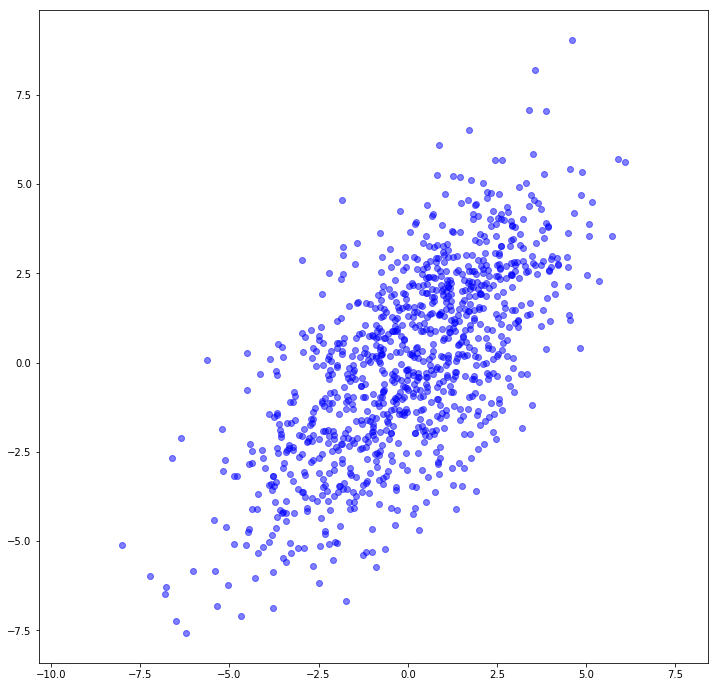

In [14]:
Mean = (0, 0)
Sigma = np.array([[5,4],[4,7]])
x,y = np.random.multivariate_normal(Mean, Sigma, 1000).T
plt.scatter(x, y, color='blue', alpha=0.5)
plt.axis('equal')
plt.show()

## $$\Sigma = \begin{pmatrix}5 & 4\\ 4 & 7\end{pmatrix}$$
* The spread in $x$ i.e, horizontal variance is 5
* The spread in $y$ i.e, horizontal variance is 7
* Clearly variations in $x$ and $y$ are not independant: the *covariance* of 
$x$ and $y$ is 4


## Maximum spread, minimum spread?
* eigenvectors give the directions of extremal spread (max variance, min variance)
* corresponding eigenvalues give variances in these directions
* easy to materialize by drawing ellipses

In [15]:
def draw_ellipse(ax, mu, e1, e2, s1, s2, **kwargs):
    t = np.linspace(0, 2*np.pi, num=200, endpoint=True)
    R = np.vstack((e1, e2)).T
    x = s1*np.cos(t)
    y = s2*np.sin(t)
    X = np.vstack((x, y))
    Z = np.dot(R, X) + np.reshape(np.array(mu), (2,1))
    ax.plot(Z[0,:], Z[1,:], lw=2, **kwargs)

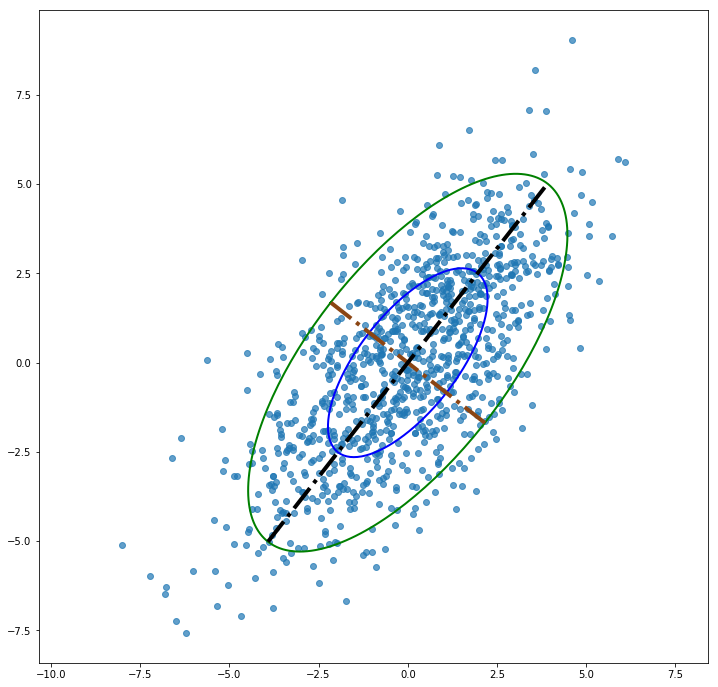

In [16]:
val, vec = np.linalg.eigh(Sigma)
e1 = vec[:,0]
e2 = vec[:,1]
s1, s2 = np.sqrt(val)
plt.scatter(x,y, alpha=0.7)
ax = plt.gca()
draw_ellipse(ax, Mean, e1, e2, s1, s2, color='blue')
draw_ellipse(ax, Mean, e1, e2, 2*s1, 2*s2, color='green')
ax.plot([-2*s1*e1[0], 2*s1*e1[0]], [-2*s1*e1[1], 2*s1*e1[1]], lw=4, linestyle='-.', color='saddlebrown')
ax.plot([-2*s2*e2[0], 2*s2*e2[0]], [-2*s2*e2[1], 2*s2*e2[1]], lw=4, linestyle='-.', color='black')
ax.axis('equal')
plt.show()